In [4]:
from google.colab import files
uploaded = files.upload()


Saving sample_transaction_data.csv to sample_transaction_data.csv


In [7]:
import pandas as pd

# Load dataset
df = pd.read_csv('sample_transaction_data.csv')  # Ensure this file is uploaded

# Basic cleaning
df.dropna(inplace=True)

# Show first 5 rows
df.head()


,Customer_Age,Transaction_Amount,Transaction_Count
0,62,263.135774,2
1,65,141.474228,19
2,18,253.289460,18
3,21,165.003131,3
4,21,207.203956,6


In [8]:
# Summary statistics
print("Descriptive Stats:\n", df.describe())

# Correlation
print("\nCorrelation Matrix:\n", df.corr())

# Skewness & Kurtosis
print("\nSkewness:\n", df.skew())
print("\nKurtosis:\n", df.kurtosis())


Descriptive Stats:
        Customer_Age  Transaction_Amount  Transaction_Count
count    100.000000          100.000000         100.000000
mean      41.570000          198.033886          10.560000
std       15.537023           48.813436           5.463044
min       18.000000           83.097692           1.000000
25%       29.000000          166.367670           6.750000
50%       41.000000          197.865593          10.000000
75%       55.250000          223.890637          15.000000
max       69.000000          316.386905          19.000000

Correlation Matrix:
                     Customer_Age  Transaction_Amount  Transaction_Count
Customer_Age            1.000000           -0.000631           0.159475
Transaction_Amount     -0.000631            1.000000          -0.000940
Transaction_Count       0.159475           -0.000940           1.000000

Skewness:
 Customer_Age          0.116515
Transaction_Amount    0.089920
Transaction_Count    -0.063303
dtype: float64

Kurtosis:
 Custome

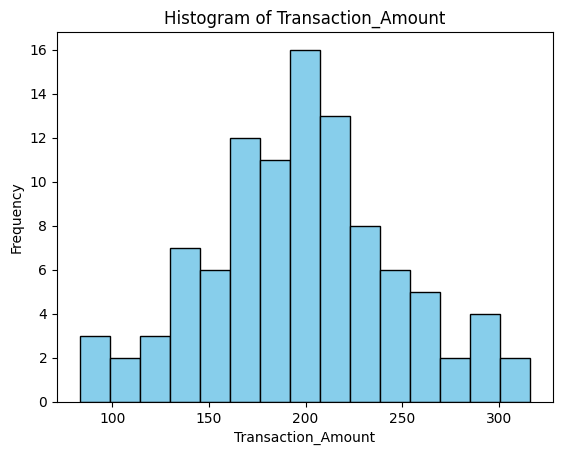

In [9]:
import matplotlib.pyplot as plt

def plot_histogram(data, column):
    """Plot histogram for a column."""
    plt.hist(data[column], bins=15, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.savefig('histogram.png')
    plt.show()

plot_histogram(df, 'Transaction_Amount')


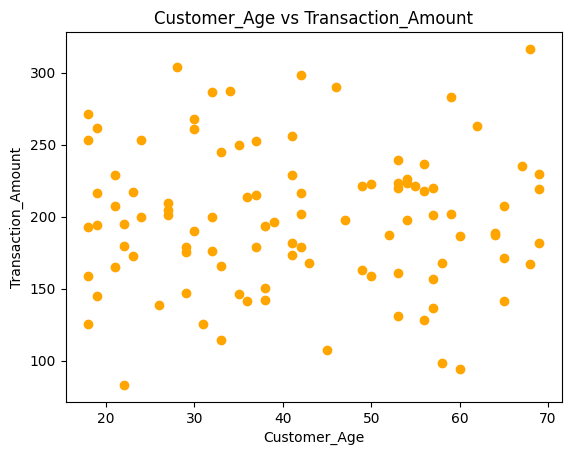

In [10]:
def plot_scatter(data, x_col, y_col):
    """Scatter plot between two variables."""
    plt.scatter(data[x_col], data[y_col], color='orange')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"{x_col} vs {y_col}")
    plt.savefig('scatter.png')
    plt.show()

plot_scatter(df, 'Customer_Age', 'Transaction_Amount')


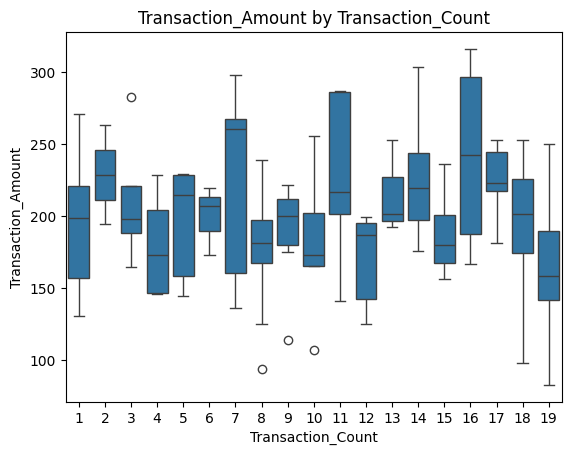

In [11]:
import seaborn as sns

def plot_box(data, x_col, y_col):
    """Boxplot grouped by a categorical variable."""
    sns.boxplot(x=data[x_col], y=data[y_col])
    plt.title(f"{y_col} by {x_col}")
    plt.savefig('boxplot.png')
    plt.show()

plot_box(df, 'Transaction_Count', 'Transaction_Amount')


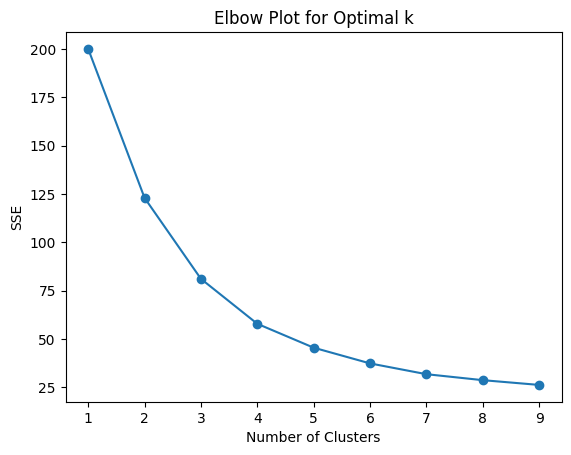

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def elbow_plot(data, features, max_k=10):
    """Plot SSE to determine optimal k."""
    sse = []
    scaled_data = StandardScaler().fit_transform(data[features])
    for k in range(1, max_k):
        model = KMeans(n_clusters=k, random_state=42)
        model.fit(scaled_data)
        sse.append(model.inertia_)

    plt.plot(range(1, max_k), sse, marker='o')
    plt.title('Elbow Plot for Optimal k')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.savefig('elbow.png')
    plt.show()

elbow_plot(df, ['Customer_Age', 'Transaction_Amount'])


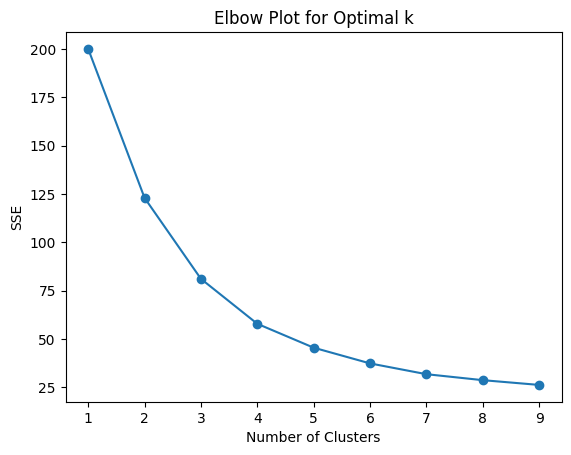

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def elbow_plot(data, features, max_k=10):
    """Plot SSE to determine optimal k."""
    sse = []
    scaled_data = StandardScaler().fit_transform(data[features])
    for k in range(1, max_k):
        model = KMeans(n_clusters=k, random_state=42)
        model.fit(scaled_data)
        sse.append(model.inertia_)

    plt.plot(range(1, max_k), sse, marker='o')
    plt.title('Elbow Plot for Optimal k')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.savefig('elbow.png')
    plt.show()

elbow_plot(df, ['Customer_Age', 'Transaction_Amount'])


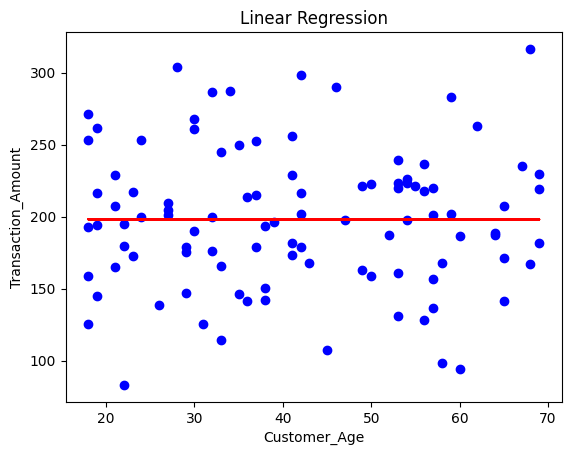

In [14]:
from sklearn.linear_model import LinearRegression

def fit_regression(data, x_col, y_col):
    """Fit and visualize regression line."""
    X = data[[x_col]]
    y = data[y_col]
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    plt.scatter(X, y, color='blue')
    plt.plot(X, y_pred, color='red')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title('Linear Regression')
    plt.savefig('regression.png')
    plt.show()

    return model

reg_model = fit_regression(df, 'Customer_Age', 'Transaction_Amount')


In [15]:
# Predict using K-Means (for new customer)
sample = pd.DataFrame({'Customer_Age': [30], 'Transaction_Amount': [220]})
scaler = StandardScaler()
scaled_sample = scaler.fit_transform(sample)
kmeans = KMeans(n_clusters=3, random_state=42).fit(StandardScaler().fit_transform(df[['Customer_Age', 'Transaction_Amount']]))
cluster = kmeans.predict(scaled_sample)
print("Predicted Cluster:", cluster)

# Predict using Regression
predicted_amount = reg_model.predict([[35]])[0]
print(f"Predicted Transaction Amount for age 35: {predicted_amount:.2f}")


Predicted Cluster: [2]
Predicted Transaction Amount for age 35: 198.05


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
